<a href="https://colab.research.google.com/github/GaurangRawat/iGnosis-Task-Assignment/blob/main/iGnosis_Tech_Assignment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries and Loading Data**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
behaviour_data = pd.read_csv('purchase_behaviour.csv')
transaction_data = pd.read_csv('transaction_data.csv')

## **Cleaning Data**

In [57]:
behaviour_data.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [58]:
behaviour_data.shape

(72637, 3)

In [59]:
behaviour_data.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [60]:
behaviour_data.duplicated().sum()

0

In [61]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [62]:
transaction_data.shape

(264836, 8)

In [63]:
transaction_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [64]:
transaction_data.duplicated().sum()

1

### The data is organized and maintained in a very clean manner.

## **Top 3 Profitable Products**

Top 3 Most Profitable Products:


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


<ipython-input-65-e1675793f0d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")


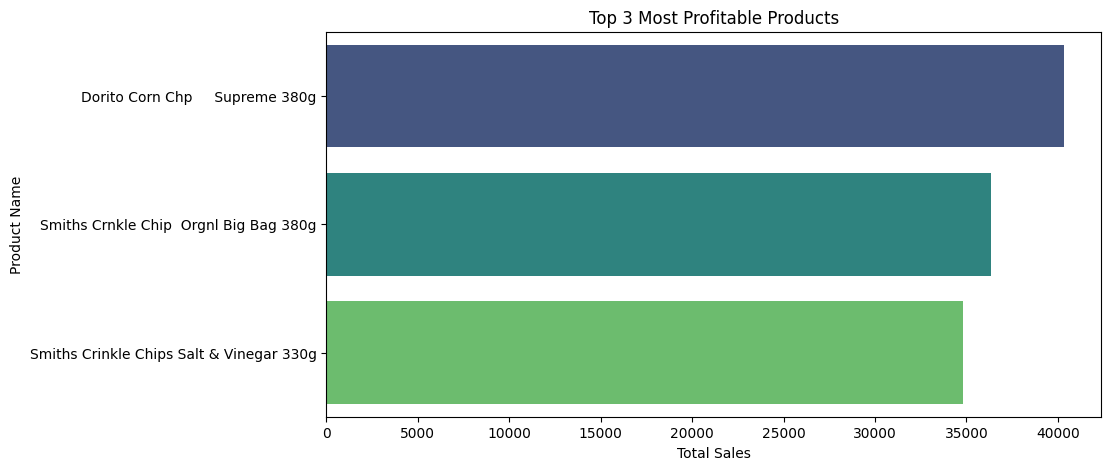

In [65]:
# Group by product and sum total sales
product_sales = transaction_data.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()

# Sort by highest sales
top_products = product_sales.sort_values(by="TOT_SALES", ascending=False).head(3)

print("Top 3 Most Profitable Products:")
display(top_products)

# Visualizing the top products
plt.figure(figsize=(10,5))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()


### **Top 3 Most Profitable Products :**

1. Dorito Corn Chip Supreme 380g is the most profitable product.

2. Smiths Crnkle Chip Orgnl Big Bag 380g is the second most profitable product.

3. Smiths Crinkle Chips Salt & Vinegar 330g is the third most profitable product.

## **The  Most Loyal Customers**

Characteristics of Most Loyal Customers:


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,4764.25
1,MIDAGE SINGLES/COUPLES,Mainstream,18249.50
2,MIDAGE SINGLES/COUPLES,Premium,11010.90
3,NEW FAMILIES,Budget,648.50
4,NEW FAMILIES,Mainstream,462.30
5,NEW FAMILIES,Premium,114.30
6,OLDER FAMILIES,Budget,81550.05
7,OLDER FAMILIES,Mainstream,52575.45
8,OLDER FAMILIES,Premium,39950.10
9,OLDER SINGLES/COUPLES,Budget,24030.70


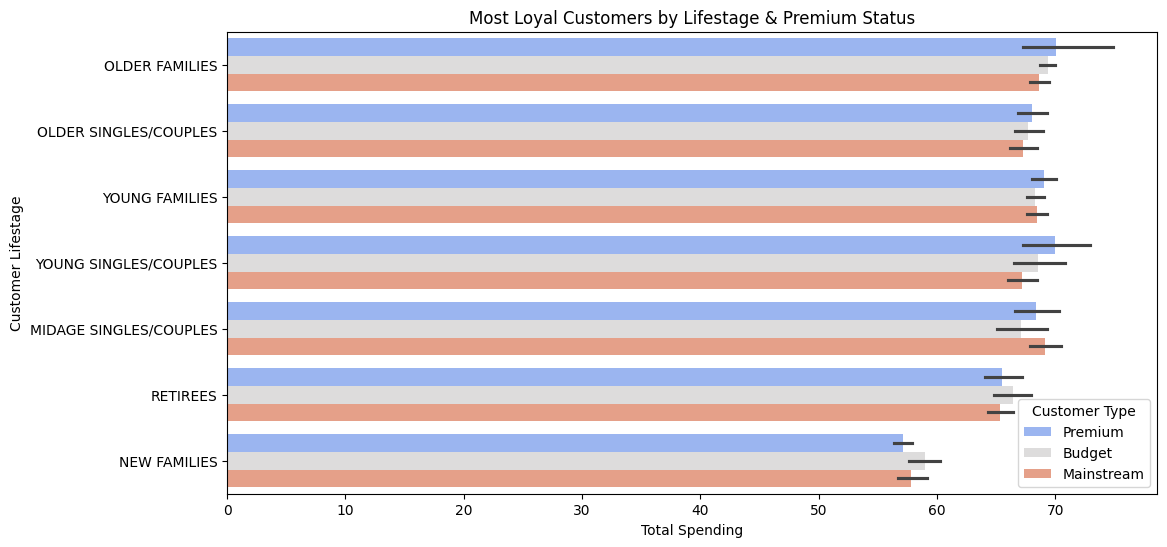

In [66]:
# Group by customer and calculate total spending
customer_spending = transaction_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()

# Merge with customer behavior data
loyal_customers = customer_spending.merge(behaviour_data, on="LYLTY_CARD_NBR")

# Find the top 10% highest spending customers
top_loyal_customers = loyal_customers.sort_values(by="TOT_SALES", ascending=False).head(int(0.1 * len(loyal_customers)))

print("Characteristics of Most Loyal Customers:")
display(top_loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index())

# Visualizing the loyal customer segments
plt.figure(figsize=(12,6))
sns.barplot(x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=top_loyal_customers, palette="coolwarm")
plt.xlabel("Total Spending")
plt.ylabel("Customer Lifestage")
plt.title("Most Loyal Customers by Lifestage & Premium Status")
plt.legend(title="Customer Type")
plt.show()


### **Loyal Customers :**

1. Older Families are the most loyal customers, with high spending across all customer types.

2. Older Singles/Couples have a similar loyalty pattern to Older Families, with a slight dip in Mainstream spending.

3. Young families tend to spend less across all customer types, suggesting they may be less established and more price-sensitive.

4. Mainstream customers are generally the most loyal, with higher spending across all lifestages.

5. New Families are hesistant to use service immediately. They tend to try various services. Whereas this service has a long strong bond with the customers.

6. Retirees tend to spend less money as they are selective of their needs and tend to spend less money.

## **Hypothesis Related To Loyal Customers**

In [67]:
# Count the number of loyal customers per segment
customer_segment_counts = top_loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Customer Count")

print("Most Common Characteristics of Loyal Customers:")
display(customer_segment_counts)


Most Common Characteristics of Loyal Customers:


,LIFESTAGE,PREMIUM_CUSTOMER,Customer Count
0,MIDAGE SINGLES/COUPLES,Budget,71
1,MIDAGE SINGLES/COUPLES,Mainstream,264
2,MIDAGE SINGLES/COUPLES,Premium,161
3,NEW FAMILIES,Budget,11
4,NEW FAMILIES,Mainstream,8
5,NEW FAMILIES,Premium,2
6,OLDER FAMILIES,Budget,1176
7,OLDER FAMILIES,Mainstream,766
8,OLDER FAMILIES,Premium,570
9,OLDER SINGLES/COUPLES,Budget,355


###**Hypothesis on Loyal Customers:**


1. **Hypothesis 1: Older Families are the most loyal customer segment.**

Evidence: Older families are the most prevalent segment across all customer tiers (Budget, Mainstream, Premium). They are also the only segment with over 1000 loyal customers in the budget tier.
2. **Hypothesis 2: Premium customers are more likely to be families than singles/couples.**

Evidence: In both older and younger life stages, the number of singles and couples in the premium tier is significantly smaller than that of families. Specifically, the data shows:

Older Singles/Couples (Premium): 324

Older Families (Premium): 570

Young Singles/Couples (Premium): 67

Young Families (Premium): 569.
3. **Hypothesis 3: Retirees shows a distinct preferences in spending**.

Evidence: Among retirees, the distribution across different spending tiers reveals distinct preferences. The data shows the following:

Retirees in the Budget tier: 197

Retirees in the Mainstream tier: 261

Retirees in the Premium tier: 154
4. **Hypothesis 4: Young families are the significant segment for the budget tier.**

Evidence: Young families dominate the budget tier with 975 loyal customers, indicating a strong potential for upselling or cross-selling to higher-tier products in the future.


#**Recommendations**

1. **Relationship with Married Customers/Families:** The relationship with married customers and families is highly satisfactory, indicating a strong level of engagement and loyalty within this demographic.
2. **Young Singles/Couples:** Young singles and couples are utilizing services frequently; however, they require additional trust-building measures to encourage long-term commitment to the platform.
3. **Attracting New Families:** New families are currently less likely to engage with your services. To address this, consider implementing eye-catching offers designed to attract these potential customers, followed by strategies to nurture them into loyal users over time.
4. **Engaging Retirees:** Retirees tend to have lower spending habits and limited needs. To capture their attention, it is essential to develop targeted offers that resonate with their preferences and encourage greater engagement with your services